In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, kruskal
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "/content/hard_fix_september_11_2024.csv"
data = pd.read_csv(file_path)



In [5]:
# Convert year and month into a single date column for better analysis
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str).replace('nan', '01') + '-01', errors='coerce')


In [6]:
# Filter rows where Total Disconnections is non-null and greater than zero
data = data.dropna(subset=['Total Disconnections'])
data = data[data['Total Disconnections'] > 0]


In [7]:
# Create period columns: Pre-Covid, Covid, Post-Covid
data['Period'] = pd.cut(
    data['Year'],
    bins=[2017, 2019, 2020, 2023],
    labels=['Pre-Covid', 'Covid', 'Post-Covid']
)


In [8]:
# National Analysis: Pre vs Post Covid using T-Test
pre_covid = data[data['Period'] == 'Pre-Covid']['Disconnection Rate']
post_covid = data[data['Period'] == 'Post-Covid']['Disconnection Rate']

t_stat, p_value = ttest_ind(pre_covid, post_covid, nan_policy='omit')
print(f"T-Test Results: T-Stat = {t_stat}, P-Value = {p_value}")


T-Test Results: T-Stat = 8.878595462120114, P-Value = 8.203098558914055e-19


In [9]:
# Kruskal-Wallis Test for all periods
kruskal_stat, kruskal_p_value = kruskal(
    data[data['Period'] == 'Pre-Covid']['Disconnection Rate'],
    data[data['Period'] == 'Covid']['Disconnection Rate'],
    data[data['Period'] == 'Post-Covid']['Disconnection Rate']
)
print(f"Kruskal-Wallis Test Results: Stat = {kruskal_stat}, P-Value = {kruskal_p_value}")


Kruskal-Wallis Test Results: Stat = nan, P-Value = nan


In [10]:
# State-wise Analysis
state_summary = data.groupby(['State', 'Period'])['Disconnection Rate'].mean().unstack()
state_summary['Percent Change'] = ((state_summary['Post-Covid'] - state_summary['Pre-Covid']) /
                                   state_summary['Pre-Covid']) * 100
print("State-wise Summary:")
print(state_summary)


State-wise Summary:
Period            Pre-Covid     Covid  Post-Covid  Percent Change
State                                                            
Alabama            0.075043  0.056960    0.052646      -29.844886
Arizona                 NaN  0.000534    0.003184             NaN
California         0.006716  0.006495    0.001158      -82.754065
Colorado           0.005095  0.002705    0.002250      -55.845360
Connecticut        0.009787  0.007945    0.005618      -42.599388
Florida            0.022871  0.013661    0.015343      -32.912364
Georgia                 NaN  0.007258    0.007939             NaN
Hawaii             0.001057       NaN    0.001356       28.251385
Idaho              0.019136  0.008729    0.014007      -26.801617
Illinois           0.002331  0.002845    0.004215       80.835071
Indiana            0.006931  0.004788    0.005378      -22.408848
Iowa               0.004032  0.001639    0.003098      -23.162861
Kansas                  NaN  0.000166    0.001509       

<ipython-input-10-97a8219487fb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_summary = data.groupby(['State', 'Period'])['Disconnection Rate'].mean().unstack()


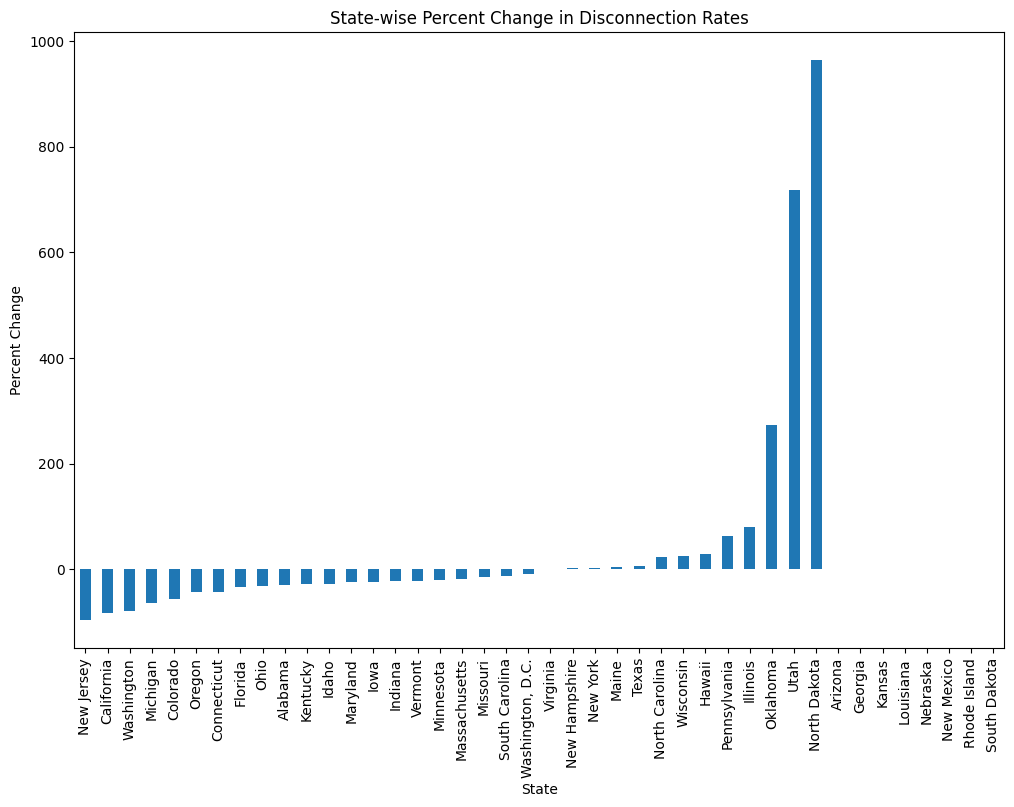

In [11]:
# Plot State-wise changes
plt.figure(figsize=(12, 8))
state_summary['Percent Change'].sort_values().plot(kind='bar', title='State-wise Percent Change in Disconnection Rates')
plt.ylabel('Percent Change')
plt.xlabel('State')
plt.show()


In [12]:
# Provider Type Analysis
provider_summary = data.groupby(['Utility Type', 'Period'])['Disconnection Rate'].mean().unstack()
print("Provider Type Analysis:")
print(provider_summary)


Provider Type Analysis:
Period                  Pre-Covid     Covid  Post-Covid
Utility Type                                           
Investor Owned Utility   0.004386  0.003763    0.004044
Municipal Utility        0.012896  0.012207    0.009557
Utility Cooperative      0.003596  0.001820    0.003317


<ipython-input-12-da159b1988c8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  provider_summary = data.groupby(['Utility Type', 'Period'])['Disconnection Rate'].mean().unstack()


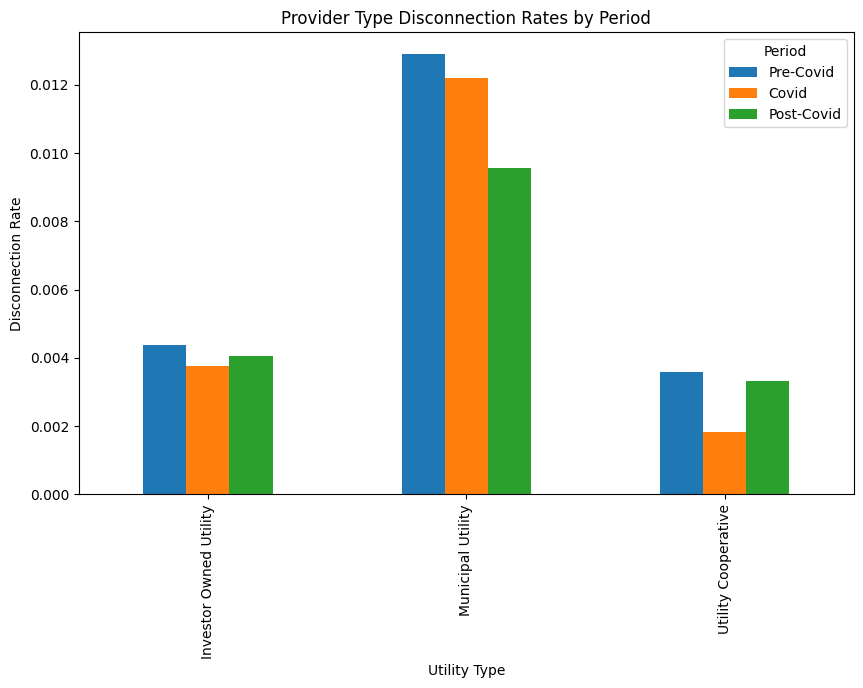

In [13]:
# Plot Provider Type Analysis
provider_summary.plot(kind='bar', figsize=(10, 6), title='Provider Type Disconnection Rates by Period')
plt.ylabel('Disconnection Rate')
plt.xlabel('Utility Type')
plt.legend(title='Period')
plt.show()
